In [9]:
# Load pickle file with syllable data and run UMAP on it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import umap

%matplotlib inline

In [11]:
# load pickle file
fs = 44100

syllables = pd.read_pickle('syllables.pkl')
syllables.head()

,start,end,audio,sonogram,spectral_derivative
0,1.418027,1.489116,"[-714, -742, -718, -702, -686, -682, -661, -66...","[[423641452.5512427, 302242973.2266859, 193954...","[[-5.863181637567577e-05, -0.00049998514597368..."
1,1.941837,2.012925,"[-1019, -985, -987, -967, -935, -905, -901, -8...","[[537691182.1141583, 419277547.2556464, 445570...","[[0.00022787008102809818, 0.002986790259529341..."
2,2.072789,2.192517,"[-451, -505, -489, -493, -560, -606, -652, -70...","[[1530968335.4681425, 1564288654.7873232, 1528...","[[0.009005660988438852, 0.009552646049950526, ..."
3,2.218707,2.424490,"[-1615, -1805, -1930, -2076, -2090, -2398, -24...","[[574061913.8935981, 422403563.7620248, 276044...","[[-0.0010127593016708313, -0.00208765962042781..."
4,2.529252,2.652721,"[1958, 1969, 2001, 2000, 1971, 1979, 1975, 195...","[[979990962.2180833, 1136811010.452191, 122036...","[[0.008527323381278578, 0.006273124371225765, ..."


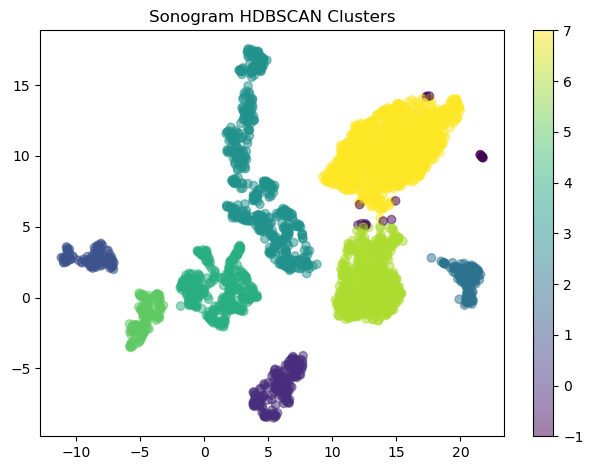

In [5]:
from sklearn.cluster import HDBSCAN

data = np.array(syllables['sonogram'].tolist())
reducer = umap.UMAP(n_neighbors=5,
                    min_dist=0.5,
                    n_components=2,
                    metric='canberra',
                    n_jobs=-1,)
embedding = reducer.fit_transform(data.reshape(data.shape[0], -1))
hdbscan = HDBSCAN(min_cluster_size=20).fit_predict(embedding)

# Use embedding to cluster the notes
plt.scatter(embedding[:, 0], embedding[:, 1], c=hdbscan, alpha=0.5)
plt.title('Sonogram HDBSCAN Clusters')
plt.colorbar()

plt.tight_layout()      

Text(0.5, 1.0, 'STFT TSNE Embedding')

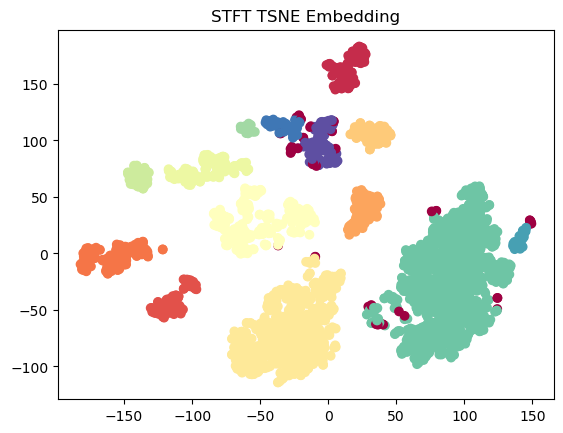

In [8]:
from sklearn.manifold import TSNE

data = np.array(syllables['sonogram'].tolist())
reducer = TSNE(n_components=2, verbose=0, perplexity=10, n_iter=10000, metric='canberra', n_jobs=-1)
embedding = reducer.fit_transform(data.reshape(data.shape[0], -1))
hdbscan = HDBSCAN(min_cluster_size=20).fit(embedding)

# Plot the TSNE embedding
plt.scatter(embedding[:, 0], embedding[:, 1], c=hdbscan.labels_, cmap='Spectral')
plt.title('STFT TSNE Embedding')